In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import MDS, TSNE
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
folder = 'plots'
datasets = [
    {
        'label': 'xray',
        'csv': 'xray_features.csv',
        'a_csv': 'xray_a_features.csv'
    },
    {
        'label': 'histology',
        'csv': 'hist_features.csv',
        'a_csv': 'hist_a_features.csv'
    }
]


In [18]:
dataset = datasets[1]
label = dataset['label']
csv = os.path.join(folder, dataset['csv'])
a_csv = os.path.join(folder, dataset['a_csv'])

features = pd.read_csv(csv, names=['class'] + ['feat_{}'.format(n) for n in range(1, 2049)])
vals = features.values
classes = vals[:, 0].astype(np.int)
features = vals[:, 1:]

a_features = pd.read_csv(a_csv, names=['class'] + ['feat_{}'.format(n) for n in range(1, 2049)])
a_vals = a_features.values
a_classes = a_vals[:, 0].astype(np.int)
a_features = a_vals[:, 1:]

In [19]:
np.random.seed(1337)
mds = MDS(n_components=2)
reduced_features = mds.fit_transform(np.concatenate([features, a_features], axis=0))

In [20]:
reduced_features.shape

(1000, 2)

In [21]:
pts = reduced_features[:500]
a_pts = reduced_features[500:]

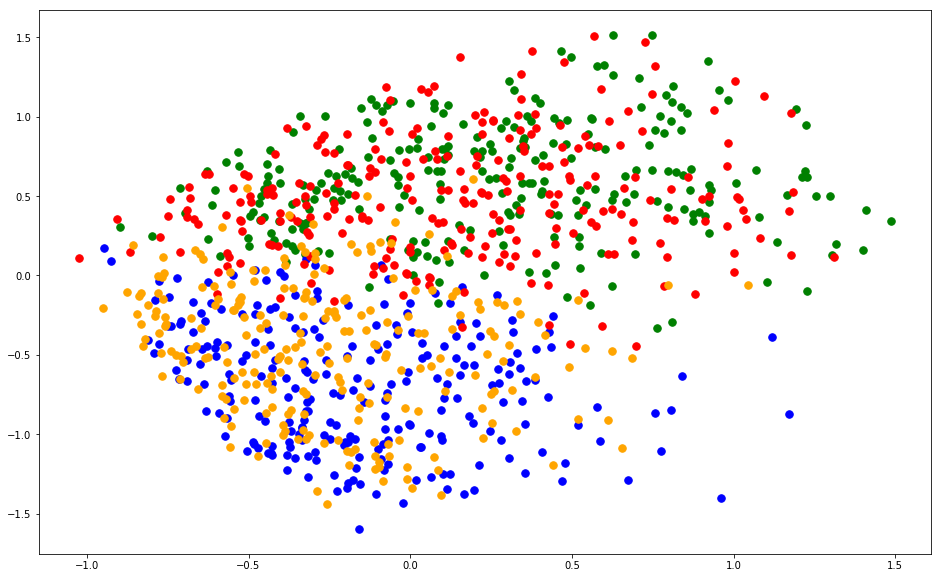

In [22]:
plt.figure()
# plt.plot(pts.T[0], pts.T[1], '.', markersize=10, color='green')
# plt.plot(a_pts.T[0], a_pts.T[1], '.', markersize=10, color='red')

inds = np.where(classes == 0)[0]
inds2 = np.where(classes == 1)[0]
plt.plot(pts[inds].T[0], pts[inds].T[1], '.', markersize=15, color='green')
plt.plot(pts[inds2].T[0], pts[inds2].T[1], '.', markersize=15, color='blue')

plt.plot(a_pts[inds].T[0], a_pts[inds].T[1], '.', markersize=15, color='red')
plt.plot(a_pts[inds2].T[0], a_pts[inds2].T[1], '.', markersize=15, color='orange')
plt.savefig('plots/{}_mds.png'.format(label))
plt.show()

In [20]:
np.random.seed(1337)
tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(np.concatenate([features, a_features], axis=0))

In [21]:
reduced_features.shape

(1000, 2)

In [22]:
pts = reduced_features[:500]
a_pts = reduced_features[500:]

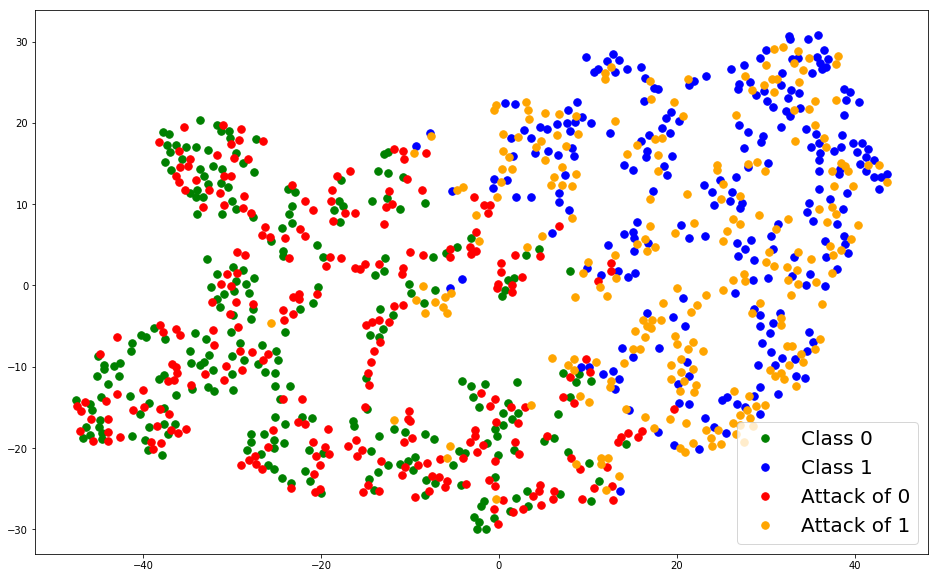

In [23]:
plt.figure()
# plt.plot(pts.T[0], pts.T[1], '.', markersize=10, color='green')
# plt.plot(a_pts.T[0], a_pts.T[1], '.', markersize=10, color='red')

inds = np.where(classes == 0)[0]
inds2 = np.where(classes == 1)[0]
plt.plot(pts[inds].T[0], pts[inds].T[1], '.', markersize=15, color='green', label='Class 0')
plt.plot(pts[inds2].T[0], pts[inds2].T[1], '.', markersize=15, color='blue', label='Class 1')

plt.plot(a_pts[inds].T[0], a_pts[inds].T[1], '.', markersize=15, color='red', label='Attack of 0')
plt.plot(a_pts[inds2].T[0], a_pts[inds2].T[1], '.', markersize=15, color='orange', label='Attack of 1')
plt.legend(fontsize=20)
plt.savefig('plots/{}_tsne.png'.format(label))
plt.show()